In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [2]:
horse = pd.read_csv(r"C:\Users\admin\Downloads\horse.csv")

In [3]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
horse.shape

(299, 28)

In [5]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
target = horse[['outcome']]

In [8]:
target.value_counts()

outcome   
lived         178
died           77
euthanized     44
dtype: int64

In [9]:
features = horse.drop('outcome',axis=1)

In [11]:
features.shape

(299, 27)

In [15]:
features = pd.get_dummies(features)

In [39]:
features.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,1,0,1,0,1,0,1,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state=70)

In [41]:
x_train

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
222,528178,37.7,66.0,12.0,NaN,31.5,6.2,1.6,2208,0,...,0,0,0,0,1,0,0,1,0,1
145,534115,38.2,48.0,NaN,2.0,42.0,71.0,NaN,3111,0,...,0,0,0,0,0,0,0,1,1,0
130,528964,37.8,30.0,12.0,NaN,NaN,NaN,NaN,2113,0,...,0,0,0,0,0,0,0,1,1,0
97,534145,38.1,88.0,32.0,1.0,55.0,60.0,NaN,3205,0,...,0,0,0,0,0,0,1,0,1,0
289,535054,38.6,45.0,16.0,NaN,43.0,58.0,NaN,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,5290482,39.5,NaN,NaN,5.5,NaN,6.7,NaN,4205,0,...,0,0,0,1,0,0,0,1,1,0
59,528904,NaN,96.0,NaN,NaN,60.0,NaN,NaN,4205,0,...,0,0,0,0,0,0,0,1,1,0
280,530624,40.0,78.0,NaN,NaN,66.0,6.5,NaN,8400,0,...,0,1,0,0,0,0,0,1,0,1
114,532349,38.4,44.0,24.0,NaN,50.0,77.0,NaN,3205,0,...,0,0,0,0,0,0,0,1,1,0


In [32]:
x_train.isnull().sum()

hospital_number                      0
rectal_temp                         41
pulse                               16
respiratory_rate                    43
nasogastric_reflux_ph              184
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [42]:
simple_impute = SimpleImputer(missing_values=np.nan,strategy='mean')

In [67]:
x_train = simple_impute.fit_transform(x_train)
x_test = simple_impute.fit_transform(x_test)

In [68]:
x_train

array([[5.28178e+05, 3.77000e+01, 6.60000e+01, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.34115e+05, 3.82000e+01, 4.80000e+01, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.28964e+05, 3.78000e+01, 3.00000e+01, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [5.30624e+05, 4.00000e+01, 7.80000e+01, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.32349e+05, 3.84000e+01, 4.40000e+01, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.29135e+05, 3.78000e+01, 4.00000e+01, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [69]:
y_test.isnull().sum()

outcome    0
dtype: int64

In [70]:
x_train_df = pd.DataFrame(x_train)

In [71]:
x_train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [72]:
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,528178.0,37.700000,66.000000,12.000000,4.8175,31.500000,6.2000,1.600000,2208.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,534115.0,38.200000,48.000000,31.546961,2.0000,42.000000,71.0000,3.038158,3111.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,528964.0,37.800000,30.000000,12.000000,4.8175,46.421951,23.1345,3.038158,2113.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,534145.0,38.100000,88.000000,32.000000,1.0000,55.000000,60.0000,3.038158,3205.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,535054.0,38.600000,45.000000,16.000000,4.8175,43.000000,58.0000,3.038158,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,5290482.0,39.500000,71.610577,31.546961,5.5000,46.421951,6.7000,3.038158,4205.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
220,528904.0,38.233333,96.000000,31.546961,4.8175,60.000000,23.1345,3.038158,4205.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
221,530624.0,40.000000,78.000000,31.546961,4.8175,66.000000,6.5000,3.038158,8400.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
222,532349.0,38.400000,44.000000,24.000000,4.8175,50.000000,77.0000,3.038158,3205.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [73]:
x_test

array([[5.28031000e+05, 3.72000000e+01, 4.20000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.30670000e+05, 3.76000000e+01, 8.80000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.35176000e+05, 3.95000000e+01, 6.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.35246000e+05, 3.79571429e+01, 8.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.35314000e+05, 3.87000000e+01, 4.80000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.30239000e+05, 3.84000000e+01, 8.40000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [74]:
a = pd.DataFrame(x_test)

In [75]:
a


,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,528031.0,37.200000,42.0,12.0,4.369231,45.946154,7.0,3.044,4124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,530670.0,37.600000,88.0,36.0,1.500000,44.000000,6.0,3.044,1400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,535176.0,39.500000,60.0,10.0,4.369231,38.000000,56.0,3.044,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,533885.0,38.300000,60.0,20.0,4.369231,34.000000,66.0,3.044,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,529126.0,38.000000,50.0,36.0,4.369231,39.000000,6.6,5.300,8400.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,527677.0,39.000000,86.0,16.0,4.369231,68.000000,5.8,6.000,5400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
71,530381.0,37.957143,70.0,36.0,4.369231,36.000000,7.3,3.044,31110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
72,535246.0,37.957143,80.0,32.0,4.369231,50.000000,80.0,3.044,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
73,535314.0,38.700000,48.0,24.0,4.369231,34.000000,63.0,3.044,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [136]:
dec_tree = DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 4)

In [137]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [138]:
y_pred = dec_tree.predict(x_test)

In [139]:
y_pred

array(['lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'died', 'euthanized', 'lived', 'died', 'lived', 'lived',
       'euthanized', 'lived', 'lived', 'euthanized', 'lived', 'lived',
       'lived', 'euthanized', 'died', 'lived', 'lived', 'died', 'died',
       'euthanized', 'lived', 'lived', 'euthanized', 'died', 'died',
       'died', 'lived', 'euthanized', 'died', 'lived', 'euthanized',
       'lived', 'lived', 'lived', 'lived', 'lived', 'euthanized', 'lived',
       'died', 'died', 'lived', 'lived', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'died', 'euthanized', 'lived', 'lived', 'lived',
       'lived', 'lived', 'died', 'lived', 'died', 'lived', 'lived',
       'lived', 'lived', 'euthanized', 'died', 'lived', 'lived', 'lived',
       'died'], dtype=object)

In [140]:
accuracy_score(y_test,y_pred)

0.6133333333333333

In [141]:
confusion_matrix(y_test,y_pred)

array([[10,  1, 12],
       [ 2,  5,  4],
       [ 4,  6, 31]], dtype=int64)

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        died       0.62      0.43      0.51        23
  euthanized       0.42      0.45      0.43        11
       lived       0.66      0.76      0.70        41

    accuracy                           0.61        75
   macro avg       0.57      0.55      0.55        75
weighted avg       0.61      0.61      0.61        75



In [143]:
pd.DataFrame(y_pred).value_counts()

lived         47
died          16
euthanized    12
dtype: int64

In [144]:
params = {'criterion' :["entropy",'gini'], 'splitter': ["random",'best'], 'max_depth' :[1,2,3,4,5,10,8,9]}

In [145]:
grid = GridSearchCV(dec_tree,params)

In [146]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 8, 9],
                         'splitter': ['random', 'best']})

In [147]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}

In [148]:
from sklearn.tree import plot_tree

[Text(0.44047619047619047, 0.9, 'X[21] <= 0.647\ngini = 0.546\nsamples = 224\nvalue = [54, 33, 137]\nclass = lived'),
 Text(0.14285714285714285, 0.7, 'X[8] <= 1050.928\ngini = 0.638\nsamples = 134\nvalue = [46, 28, 60]\nclass = lived'),
 Text(0.09523809523809523, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 14]\nclass = lived'),
 Text(0.19047619047619047, 0.5, 'X[16] <= 0.67\ngini = 0.652\nsamples = 120\nvalue = [46, 28, 46]\nclass = died'),
 Text(0.09523809523809523, 0.3, 'X[7] <= 2.058\ngini = 0.632\nsamples = 68\nvalue = [17, 18, 33]\nclass = lived'),
 Text(0.047619047619047616, 0.1, 'gini = 0.444\nsamples = 18\nvalue = [0, 12, 6]\nclass = euthanized'),
 Text(0.14285714285714285, 0.1, 'gini = 0.578\nsamples = 50\nvalue = [17, 6, 27]\nclass = lived'),
 Text(0.2857142857142857, 0.3, 'X[6] <= 17.479\ngini = 0.589\nsamples = 52\nvalue = [29, 10, 13]\nclass = died'),
 Text(0.23809523809523808, 0.1, 'gini = 0.459\nsamples = 37\nvalue = [26, 4, 7]\nclass = died'),
 Text(0.333333333333333

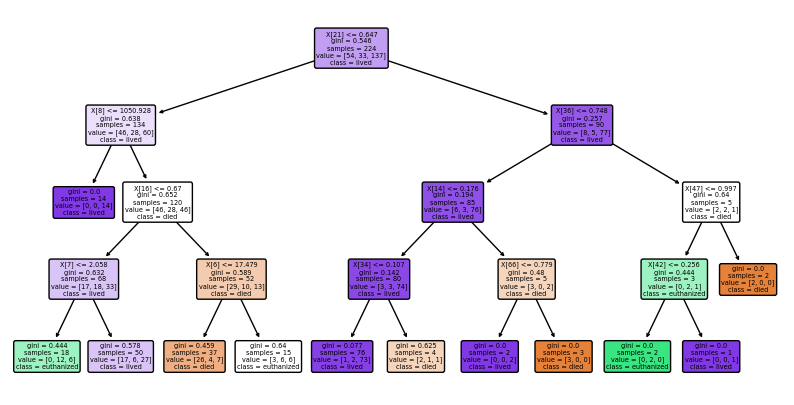

In [152]:
plt.figure(figsize=(10,5))
plot_tree(dec_tree,filled=True,rounded=True,class_names=horse.outcome,feature_names=horse.get(features))